In [1]:
import numpy as np
from Adaline import Adaline

Now test it

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# select only setosa and versicolor (to test a binary classification)
y = df[df['target_name'].isin(['setosa', 'versicolor'])]['target']

#  keep sepal length and petal length
X = df[['sepal length (cm)', 'petal length (cm)']].loc[y.index]
X.tail()

,sepal length (cm),petal length (cm)
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0
99,5.7,4.1


In [3]:
# Standardize values for better gradient descent performance

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

ada = Adaline(eta=0.5, n_iter=20, random_state=1310)

ada.fit(X_normalized.values, y.values)

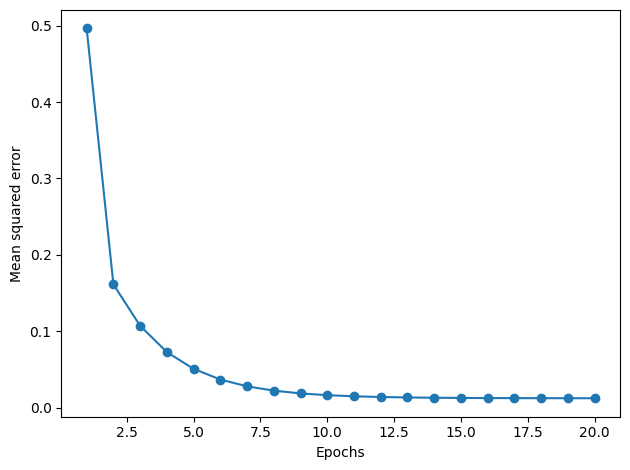

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()

It converges to 0